We are using miniconda3 with Python 3.10.9 in our Kernel

CWI vs SAAR chart originates from the Rainfall Runoff Management for Developments Report – SC030219, which itself derived from the Flood Studies Report (FSR). The data was then extracted into a CSV file (SAAR_CWI.csv), which was a laborious and time consuming process. Then the NumPy Polynomial Fitting is used to try and curve fit. Obviously there more efficient ways of achieving this, i.e. probably linear interpolation between some known values would do just fine, but where would the fun be in that?

In [27]:
import pandas
import numpy as np
import matplotlib.pyplot as plt


And here's the figure we are trying to reproduce.

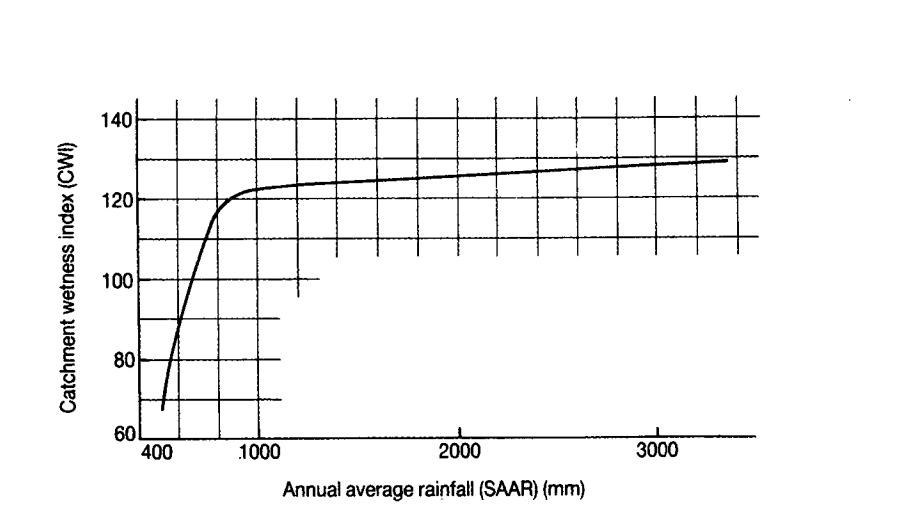

In [28]:

saar_cwi_data = pandas.read_csv('SAAR_CWI.csv')
print(saar_cwi_data)

x = saar_cwi_data['SAAR']
y = saar_cwi_data['CWI']


         SAAR         CWI
0    507.6152   65.951675
1    509.9632   67.071795
2    514.4253   68.331695
3    518.8047   69.722845
4    523.2926   71.353080
..        ...         ...
59  3194.3764  127.948730
60  3260.0755  128.134220
61  3313.3198  128.264015
62  3352.7202  128.350405
63  3397.8174  128.350405

[64 rows x 2 columns]


In [29]:

polynomial_degree = 16

p = np.polyfit(x,y,polynomial_degree)

def poly_CWI(p,saar):
    return np.polyval(p,saar)

print(p)


[-6.03680227e-48  2.02474674e-43 -3.13212422e-39  2.96331036e-35
 -1.91707963e-31  8.98177539e-28 -3.14835283e-24  8.41051934e-21
 -1.72785095e-17  2.73437666e-14 -3.31634025e-11  3.04434046e-08
 -2.06954364e-05  1.00522241e-02 -3.28467917e+00  6.44612918e+02
 -5.71916990e+04]


The above are Polynomial Coefficients, highest power first. If y was 2-D, the coefficients for k-th data set are in p[:,k]. 

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html for further info

In [30]:

for i in [500,600,700,800,900,1000,1100]:
    print("if SAAR is {} then the predicted CWI:\t{}".format(i,str(poly_CWI(p,i))))

if SAAR is 500 then the predicted CWI:	62.856798631342826
if SAAR is 600 then the predicted CWI:	88.05437012988841
if SAAR is 700 then the predicted CWI:	104.91985874036618
if SAAR is 800 then the predicted CWI:	116.48253721719084
if SAAR is 900 then the predicted CWI:	121.33271057954698
if SAAR is 1000 then the predicted CWI:	122.45267326386966
if SAAR is 1100 then the predicted CWI:	122.75558329997875


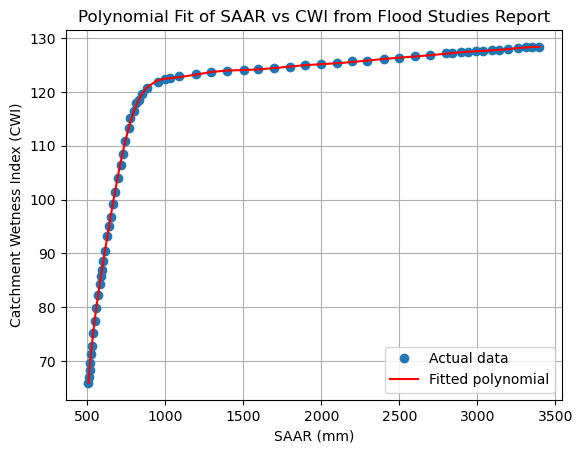

In [31]:

y_p = np.polyval(p, x)

plt.plot(x, y, 'o', label='Actual data')
plt.plot(x, y_p, 'r-', label='Fitted polynomial')
plt.legend(loc='best')
plt.grid(True)

plt.title('Polynomial Fit of SAAR vs CWI from Flood Studies Report')
plt.xlabel('SAAR (mm)')
plt.ylabel('Catchment Wetness Index (CWI)')

plt.show()


and just a reminder, this is what we are aiming for:

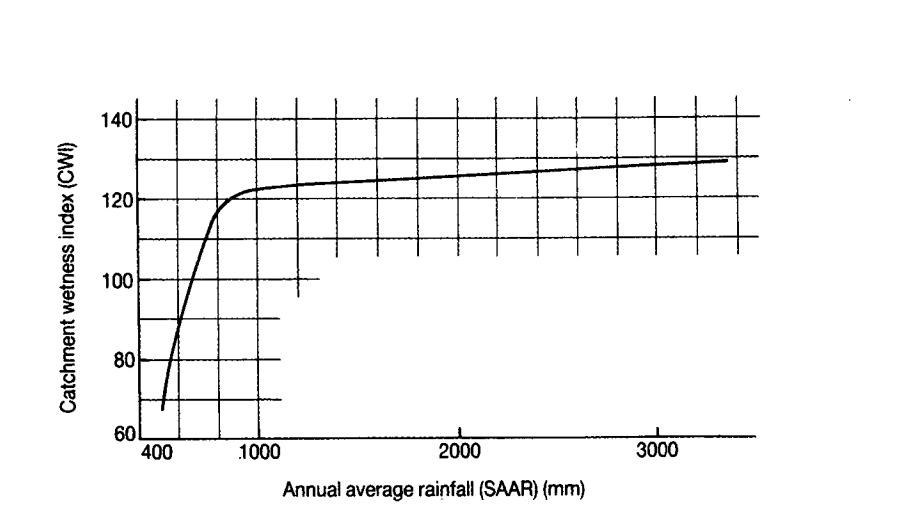

residual plot:   

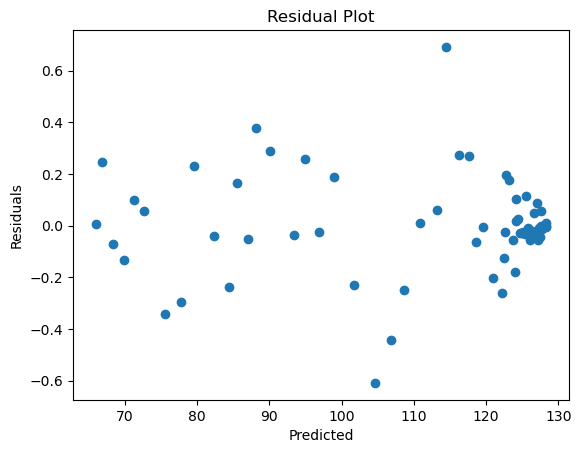

In [32]:
residuals = y - y_p
plt.scatter(y_p, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

Coefficient of Determination:

In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_p)
print(r2)

0.9999096603601513


In [34]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, y_p))
print(rmse)

0.19265593656572877


our RMSE looks pretty good (i.e. low). Pretty good for what we are trying to achieve anyway.

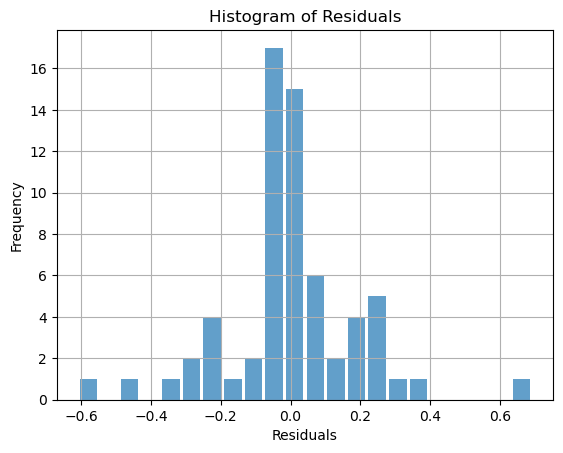

In [35]:
plt.hist(residuals, bins='auto', alpha=0.7, rwidth=0.85)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Final check for any anomalies within the fitted values. It's conceivable that for some X values, corresponding Y values might skyrocket (or nosedive or anywhere inbetween but far from the expected value), especially given the degree of our polynomial. So we will check a large number of increments to ensure that no such anomalies occur.

1000000 steps is quite more than what is needed anyway. And no unexpected behaviour to be seen

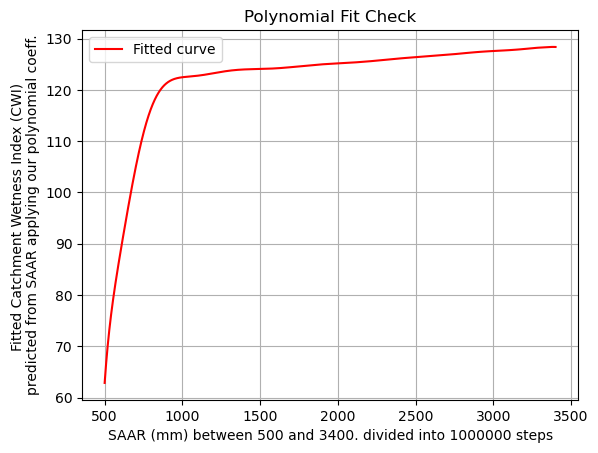

In [45]:
saar = np.linspace(500, 3400, 1000000) # note the range between 500 and 3400 is divided into 10000 steps
cwi_fitted = np.polyval(p, saar) # note the fit is performed on each saar increment using polynomial coefficient obtained earlier

plt.plot(saar, cwi_fitted, 'r-', label='Fitted curve')
plt.legend(loc='best')
plt.grid(True)

plt.title('Polynomial Fit Check')
plt.xlabel('SAAR (mm) between 500 and 3400. divided into 1000000 steps')
plt.ylabel('Fitted Catchment Wetness Index (CWI) \npredicted from SAAR applying our polynomial coeff.')

plt.show()


In [46]:

print("Finally, print 6 first items in the SAAR array just to demonstrate what kind of fractional increments we are talking about...")
for i in range(6):
    print(saar[i])
print("the incretement between the x axis values is {}".format(saar[1]-saar[0]))

Finally, print 6 first items in the SAAR array just to demonstrate what kind of fractional increments we are talking about...
500.0
500.0029000029
500.0058000058
500.00870000870003
500.0116000116
500.0145000145
the incretement between the x axis values is 0.002900002899991705
